In [73]:
# import packages
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import scipy.stats as sts
import numpy as np

amplification_DF = pd.read_csv('amplification_DF_division.csv')
n_boots = 1000

Why some units show both amplification and quenching and some just quenching. Based on eye balling the data, it seemed that units with high baseline fano-factor show quenching. Let's quantify that at the population. The analyses below show that indeed, units that show only quenching, have on average higher baseline variability.

Mean and SEM of bsl for each layer and quencher / mixer type:
layer  qtype_signi
G      mixer          1.767429
       quencher       1.645983
IG     mixer          1.646851
       quencher       2.816324
SG     mixer          2.304302
       quencher       4.703462
Name: bsl, dtype: float64
layer  qtype_signi
G      mixer          0.191045
       quencher       0.143494
IG     mixer          0.138462
       quencher       0.404018
SG     mixer          0.286886
       quencher       0.391942
Name: bsl, dtype: float64
                  df     sum_sq    mean_sq          F        PR(>F)
C(qtype_signi)   1.0  43.084671  43.084671  35.488405  6.987013e-08
C(layer)         2.0  28.663561  14.331780  11.804941  3.320377e-05
Residual        78.0  94.695841   1.214049        NaN           NaN

Baseline difference between quencher and mixer in SG:
Ttest_indResult(statistic=-5.035096947885139, pvalue=2.300840001154506e-05)

Baseline difference between quencher and mixer in G:
Ttest_indResult(sta

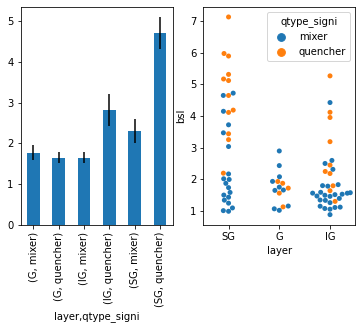

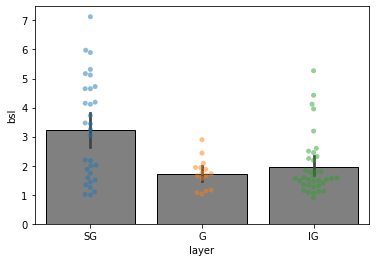

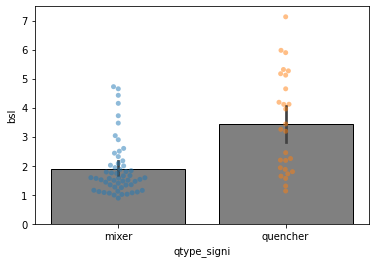

In [20]:
ax = plt.subplot(1,2,1)
SEM = amplification_DF.groupby(['layer','qtype_signi'])['bsl'].sem()
amplification_DF.groupby(['layer','qtype_signi'])['bsl'].mean().plot(kind='bar',yerr=SEM,ax=ax)

ax = plt.subplot(1,2,2)
sns.swarmplot(x='layer',y='bsl',data=amplification_DF,hue='qtype_signi',ax=ax)

plt.figure()
sns.barplot(y='bsl',x='layer',data=amplification_DF,fc='gray',ec='black')
sns.swarmplot(y='bsl',x='layer',data=amplification_DF,alpha=0.5)

plt.figure()
sns.barplot(y='bsl',x='qtype_signi',data=amplification_DF,fc='gray',ec='black')
sns.swarmplot(y='bsl',x='qtype_signi',data=amplification_DF,alpha=0.5)

print('Mean and SEM of bsl for each layer and quencher / mixer type:')
print(amplification_DF.groupby(['layer','qtype_signi'])['bsl'].mean())
print(amplification_DF.groupby(['layer','qtype_signi'])['bsl'].sem())

lm = ols('bsl ~ C(qtype_signi) + C(layer)',data=amplification_DF).fit()
table = sm.stats.anova_lm(lm,typ=1)
print(table)

SG = amplification_DF[amplification_DF['layer']=='SG']
G = amplification_DF[amplification_DF['layer']=='G']
IG = amplification_DF[amplification_DF['layer']=='IG']

print('\nBaseline difference between quencher and mixer in SG:')
#------------------------------------------------------------------------------
mixer = SG.query('qtype_signi=="mixer"')['bsl']
quencher = SG.query('qtype_signi=="quencher"')['bsl']
print(sts.ttest_ind(mixer,quencher,nan_policy='omit'))

print('\nBaseline difference between quencher and mixer in G:')
#------------------------------------------------------------------------------
mixer = G.query('qtype_signi=="mixer"')['bsl']
quencher = G.query('qtype_signi=="quencher"')['bsl']
print(sts.ttest_ind(mixer,quencher,nan_policy='omit'))

print('\nBaseline difference between quencher and mixer in IG:')
#------------------------------------------------------------------------------
mixer = IG.query('qtype_signi=="mixer"')['bsl']
quencher = IG.query('qtype_signi=="quencher"')['bsl']
print(sts.ttest_ind(mixer,quencher,nan_policy='omit'))

print('\nBaseline difference between quencher and mixer across layers:')
#------------------------------------------------------------------------------
mixer = amplification_DF.query('qtype_signi=="mixer"')['bsl']
quencher = amplification_DF.query('qtype_signi=="quencher"')['bsl']
print(sts.ttest_ind(mixer,quencher,nan_policy='omit'))
print('Mixer:',mixer.mean(),'+-',mixer.sem(),'Quencher:',quencher.mean(),'+-',quencher.sem())

print('\nBaseline difference between layers:')
#------------------------------------------------------------------------------
print('SG:',SG['bsl'].mean(),'+-',SG['bsl'].sem(),'\n','G:',G['bsl'].mean(),'+-',G['bsl'].sem(),'\nIG:',IG['bsl'].mean(),'+-',IG['bsl'].sem())

Next observation from looking at the raw data was that it seems that amplification happens at small stimulus diameter whereas quenching happens at somewhat larger diameter. Below we quantify this observation.

In [74]:
# brute force bootstrap median
n_boots = 9999
# stimulus diameter relative to RF at maxquench / maxmplif 
RFnormed_maxquench_diam = amplification_DF['maxquench_diam']/amplification_DF['RFdiam']
RFnormed_maxamplif_diam = amplification_DF['maxamplif_diam']/amplification_DF['RFdiam']
amplification_DF.insert(loc=2,column='RFnormed_maxquench_diam',value=RFnormed_maxquench_diam)
amplification_DF.insert(loc=2,column='RFnormed_maxamplif_diam',value=RFnormed_maxamplif_diam)

# stimulus diameter at maxquench / maxmplif 
SG = amplification_DF[amplification_DF['layer']=='SG']
G = amplification_DF[amplification_DF['layer']=='G']
IG = amplification_DF[amplification_DF['layer']=='IG']

maxquench_diam_bootstrap = np.nan * np.ones(n_boots)
maxquench_diam_bootstrap_SG = np.nan * np.ones(n_boots)
maxquench_diam_bootstrap_G  = np.nan * np.ones(n_boots)
maxquench_diam_bootstrap_IG = np.nan * np.ones(n_boots)

maxamplif_diam_bootstrap = np.nan * np.ones(n_boots)
maxamplif_diam_bootstrap_SG = np.nan * np.ones(n_boots)
maxamplif_diam_bootstrap_G  = np.nan * np.ones(n_boots)
maxamplif_diam_bootstrap_IG = np.nan * np.ones(n_boots)

maxquench_diam_RFnormed_bootstrap = np.nan * np.ones(n_boots)
maxquench_diam_RFnormed_bootstrap_SG = np.nan * np.ones(n_boots)
maxquench_diam_RFnormed_bootstrap_G  = np.nan * np.ones(n_boots)
maxquench_diam_RFnormed_bootstrap_IG = np.nan * np.ones(n_boots)

maxamplif_diam_RFnormed_bootstrap = np.nan * np.ones(n_boots)
maxamplif_diam_RFnormed_bootstrap_SG = np.nan * np.ones(n_boots)
maxamplif_diam_RFnormed_bootstrap_G  = np.nan * np.ones(n_boots)
maxamplif_diam_RFnormed_bootstrap_IG = np.nan * np.ones(n_boots)


for i in range(n_boots):
    maxquench_diam_bootstrap = np.nanmedian(np.random.choice(amplification_DF['maxquench_diam'],size=len(amplification_DF),replace=True))
    maxquench_diam_bootstrap_SG[i] = np.nanmedian(np.random.choice(SG['maxquench_diam'],size=len(SG),replace=True))
    maxquench_diam_bootstrap_G[i]  = np.nanmedian(np.random.choice(G['maxquench_diam'],size=len(G),replace=True))
    maxquench_diam_bootstrap_IG[i] = np.nanmedian(np.random.choice(IG['maxquench_diam'],size=len(IG),replace=True))

    maxquench_diam_RFnormed_bootstrap = np.nanmedian(np.random.choice(amplification_DF['RFnormed_maxquench_diam'],size=len(amplification_DF),replace=True))
    maxquench_diam_RFnormed_bootstrap_SG[i] = np.nanmedian(np.random.choice(SG['RFnormed_maxquench_diam'],size=len(SG),replace=True))
    maxquench_diam_RFnormed_bootstrap_G[i]  = np.nanmedian(np.random.choice(G['RFnormed_maxquench_diam'],size=len(G),replace=True))
    maxquench_diam_RFnormed_bootstrap_IG[i] = np.nanmedian(np.random.choice(IG['RFnormed_maxquench_diam'],size=len(IG),replace=True))

    maxamplif_diam_bootstrap = np.nanmedian(np.random.choice(amplification_DF['maxamplif_diam'],size=len(amplification_DF),replace=True))
    maxamplif_diam_bootstrap_SG[i] = np.nanmedian(np.random.choice(SG['maxamplif_diam'],size=len(SG),replace=True))
    maxamplif_diam_bootstrap_G[i]  = np.nanmedian(np.random.choice(G['maxamplif_diam'],size=len(G),replace=True))
    maxamplif_diam_bootstrap_IG[i] = np.nanmedian(np.random.choice(IG['maxamplif_diam'],size=len(IG),replace=True))
    
    maxamplif_diam_RFnormed_bootstrap = np.nanmedian(np.random.choice(amplification_DF['RFnormed_maxamplif_diam'],size=len(amplification_DF),replace=True))
    maxamplif_diam_RFnormed_bootstrap_SG[i] = np.nanmedian(np.random.choice(SG['RFnormed_maxamplif_diam'],size=len(SG),replace=True))
    maxamplif_diam_RFnormed_bootstrap_G[i]  = np.nanmedian(np.random.choice(G['RFnormed_maxamplif_diam'],size=len(G),replace=True))
    maxamplif_diam_RFnormed_bootstrap_IG[i] = np.nanmedian(np.random.choice(IG['RFnormed_maxamplif_diam'],size=len(IG),replace=True))

maxquench_diam_SD = np.array([np.nanstd(maxquench_diam_bootstrap_SG),np.nanstd(maxquench_diam_bootstrap_G),np.nanstd(maxquench_diam_bootstrap_IG)])
maxquench_diam = np.array([np.nanmedian(SG['maxquench_diam']),np.nanmedian(G['maxquench_diam']),np.nanmedian(IG['maxquench_diam'])])

RFnormed_maxquench_diam_SD = np.array([np.nanstd(maxquench_diam_RFnormed_bootstrap_SG),np.nanstd(maxquench_diam_RFnormed_bootstrap_G),np.nanstd(maxquench_diam_RFnormed_bootstrap_IG)])
RFnormed_maxquench_diam = np.array([np.nanmedian(SG['RFnormed_maxquench_diam']),np.nanmedian(G['RFnormed_maxquench_diam']),np.nanmedian(IG['RFnormed_maxquench_diam'])])

maxamplif_diam_SD = np.array([np.nanstd(maxquench_diam_bootstrap_SG),np.nanstd(maxquench_diam_bootstrap_G),np.nanstd(maxquench_diam_bootstrap_IG)])
maxamplif_diam = np.array([np.nanmedian(SG['maxamplif_diam']),np.nanmedian(G['maxamplif_diam']),np.nanmedian(IG['maxamplif_diam'])])

RFnormed_maxamplif_diam_SD = np.array([np.nanstd(maxamplif_diam_RFnormed_bootstrap_SG),np.nanstd(maxamplif_diam_RFnormed_bootstrap_G),np.nanstd(maxamplif_diam_RFnormed_bootstrap_IG)])
RFnormed_maxamplif_diam = np.array([np.nanmedian(SG['RFnormed_maxamplif_diam']),np.nanmedian(G['RFnormed_maxamplif_diam']),np.nanmedian(IG['RFnormed_maxamplif_diam'])])

[Text(1, 0, 'SG'), Text(3, 0, 'G'), Text(5, 0, 'IG')]

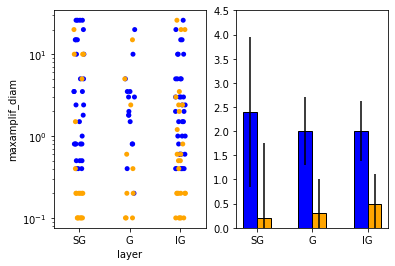

In [26]:
ax = plt.subplot(1,2,1)
sns.stripplot(x='layer',y='maxquench_diam',data=amplification_DF,color='blue',ax=ax)
sns.stripplot(x='layer',y='maxamplif_diam',data=amplification_DF,color='orange',ax=ax)
ax.set_yscale('log')

ax = plt.subplot(1,2,2)
ax.bar([0.75,2.75,4.75],maxquench_diam,yerr=maxquench_diam_SD,fc='blue',ec='black',width=0.5)
ax.bar(np.array([0.75,2.75,4.75])+0.5,maxamplif_diam,yerr=maxamplif_diam_SD,fc='orange',ec='black',width=0.5)
ax.set_ylim([0,4.5])
ax.set_xticks([1,3,5])
ax.set_xticklabels(['SG','G','IG'])

[Text(1, 0, 'SG'), Text(3, 0, 'G'), Text(5, 0, 'IG')]

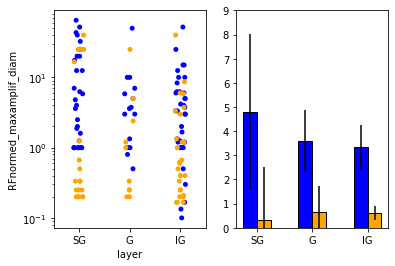

In [77]:
ax = plt.subplot(1,2,1)
sns.stripplot(x='layer',y='RFnormed_maxquench_diam',data=amplification_DF,color='blue',ax=ax)
sns.stripplot(x='layer',y='RFnormed_maxamplif_diam',data=amplification_DF,color='orange',ax=ax)
ax.set_yscale('log')

ax = plt.subplot(1,2,2)
ax.bar([0.75,2.75,4.75],RFnormed_maxquench_diam,yerr=RFnormed_maxquench_diam_SD,fc='blue',ec='black',width=0.5)
ax.bar(np.array([0.75,2.75,4.75])+0.5,RFnormed_maxamplif_diam,yerr=RFnormed_maxamplif_diam_SD,fc='orange',ec='black',width=0.5)
ax.set_ylim([0,9.0])
ax.set_xticks([1,3,5])
ax.set_xticklabels(['SG','G','IG'])

In [42]:
test_maxquench_diam_bootstrap_SG = np.nan * np.ones(n_boots)
test_maxamplif_diam_bootstrap_SG = np.nan * np.ones(n_boots)
test_maxquench_diam_bootstrap_G = np.nan * np.ones(n_boots)
test_maxamplif_diam_bootstrap_G = np.nan * np.ones(n_boots)
test_maxquench_diam_bootstrap_IG = np.nan * np.ones(n_boots)
test_maxamplif_diam_bootstrap_IG = np.nan * np.ones(n_boots)

RFnormed_test_maxquench_diam_bootstrap_SG = np.nan * np.ones(n_boots)
RFnormed_test_maxamplif_diam_bootstrap_SG = np.nan * np.ones(n_boots)
RFnormed_test_maxquench_diam_bootstrap_G = np.nan * np.ones(n_boots)
RFnormed_test_maxamplif_diam_bootstrap_G = np.nan * np.ones(n_boots)
RFnormed_test_maxquench_diam_bootstrap_IG = np.nan * np.ones(n_boots)
RFnormed_test_maxamplif_diam_bootstrap_IG = np.nan * np.ones(n_boots)

for i in range(n_boots):
    test_maxquench_diam_bootstrap_SG[i] = np.nanmedian(np.random.choice(np.concatenate((SG['maxquench_diam'],SG['maxamplif_diam'])),size=len(SG),replace=True))
    test_maxamplif_diam_bootstrap_SG[i] = np.nanmedian(np.random.choice(np.concatenate((SG['maxquench_diam'],SG['maxamplif_diam'])),size=len(SG),replace=True))
    RFnormed_test_maxquench_diam_bootstrap_SG[i] = np.nanmedian(np.random.choice(np.concatenate((SG['RFnormed_maxquench_diam'],SG['RFnormed_maxamplif_diam'])),size=len(SG),replace=True))
    RFnormed_test_maxamplif_diam_bootstrap_SG[i] = np.nanmedian(np.random.choice(np.concatenate((SG['RFnormed_maxquench_diam'],SG['RFnormed_maxamplif_diam'])),size=len(SG),replace=True))

    test_maxquench_diam_bootstrap_G[i] = np.nanmedian(np.random.choice(np.concatenate((G['maxquench_diam'],G['maxamplif_diam'])),size=len(G),replace=True))
    test_maxamplif_diam_bootstrap_G[i] = np.nanmedian(np.random.choice(np.concatenate((G['maxquench_diam'],G['maxamplif_diam'])),size=len(G),replace=True))
    RFnormed_test_maxquench_diam_bootstrap_G[i] = np.nanmedian(np.random.choice(np.concatenate((G['RFnormed_maxquench_diam'],G['RFnormed_maxamplif_diam'])),size=len(G),replace=True))
    RFnormed_test_maxamplif_diam_bootstrap_G[i] = np.nanmedian(np.random.choice(np.concatenate((G['RFnormed_maxquench_diam'],G['RFnormed_maxamplif_diam'])),size=len(G),replace=True))

    test_maxquench_diam_bootstrap_IG[i] = np.nanmedian(np.random.choice(np.concatenate((IG['maxquench_diam'],IG['maxamplif_diam'])),size=len(IG),replace=True))
    test_maxamplif_diam_bootstrap_IG[i] = np.nanmedian(np.random.choice(np.concatenate((IG['maxquench_diam'],IG['maxamplif_diam'])),size=len(IG),replace=True))
    RFnormed_test_maxquench_diam_bootstrap_IG[i] = np.nanmedian(np.random.choice(np.concatenate((IG['RFnormed_maxquench_diam'],IG['RFnormed_maxamplif_diam'])),size=len(IG),replace=True))
    RFnormed_test_maxamplif_diam_bootstrap_IG[i] = np.nanmedian(np.random.choice(np.concatenate((IG['RFnormed_maxquench_diam'],IG['RFnormed_maxamplif_diam'])),size=len(IG),replace=True))

SG_diff = test_maxquench_diam_bootstrap_SG - test_maxamplif_diam_bootstrap_SG
G_diff  = test_maxquench_diam_bootstrap_G - test_maxamplif_diam_bootstrap_G
IG_diff = test_maxquench_diam_bootstrap_IG - test_maxamplif_diam_bootstrap_IG

RFnormed_SG_diff = RFnormed_test_maxquench_diam_bootstrap_SG - RFnormed_test_maxamplif_diam_bootstrap_SG
RFnormed_G_diff = RFnormed_test_maxquench_diam_bootstrap_G - RFnormed_test_maxamplif_diam_bootstrap_G
RFnormed_IG_diff = RFnormed_test_maxquench_diam_bootstrap_IG - RFnormed_test_maxamplif_diam_bootstrap_IG

print('\nDifference of medians in SG is significant at alpha = 0.05:',
        np.percentile(SG_diff,95) < (np.nanmedian(SG['maxquench_diam']) - np.nanmedian(SG['maxamplif_diam'])))

print('\nDifference of medians in G is significant at alpha = 0.05:',
        np.percentile(G_diff,95) < (np.nanmedian(G['maxquench_diam']) - np.nanmedian(G['maxamplif_diam'])))

print('\nDifference of medians in IG is significant at alpha = 0.05:',
        np.percentile(IG_diff,95) < (np.nanmedian(IG['maxquench_diam']) - np.nanmedian(IG['maxamplif_diam'])))

print('\nDifference of RFnormed medians in SG is significant at alpha = 0.05:',
        np.percentile(RFnormed_SG_diff,95) < (np.nanmedian(SG['RFnormed_maxquench_diam']) - np.nanmedian(SG['RFnormed_maxamplif_diam'])))

print('\nDifference of RFnormed medians in G is significant at alpha = 0.05:',
        np.percentile(RFnormed_G_diff,95) < (np.nanmedian(G['RFnormed_maxquench_diam']) - np.nanmedian(G['RFnormed_maxamplif_diam'])))

print('\nDifference of RFnormed medians in IG is significant at alpha = 0.05:',
        np.percentile(RFnormed_IG_diff,95) < (np.nanmedian(IG['RFnormed_maxquench_diam']) - np.nanmedian(IG['RFnormed_maxamplif_diam'])))



Difference of medians in SG is significant at alpha = 0.05: False

Difference of medians in G is significant at alpha = 0.05: False

Difference of medians in IG is significant at alpha = 0.05: True

Difference of RFnormed medians in SG is significant at alpha = 0.05: False

Difference of RFnormed medians in G is significant at alpha = 0.05: False

Difference of RFnormed medians in IG is significant at alpha = 0.05: True


The population difference in median stimulus diameter was significant only in IG.

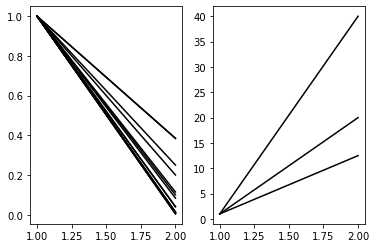

In [69]:
SG_data = np.nan * np.ones((len(SG),2))
SG_data[:,0] = SG['maxquench_diam']
SG_data[:,1] = SG['maxamplif_diam']
SG_data[:,1] = SG_data[:,1] / SG_data[:,0]
SG_data[:,0] = SG_data[:,0] / SG_data[:,0]

ax  = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
a = 0
for i in range(SG_data.shape[0]):
    if ~np.isnan(SG_data[i,1]):
        if SG_data[i,0] >= SG_data[i,1]:
            ax.plot(np.array([1,2]),SG_data[i,:],'k-')
        else:
            a += 1
            ax2.plot(np.array([1,2]),SG_data[i,:],'k-')

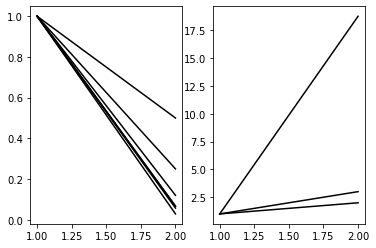

In [70]:
G_data = np.nan * np.ones((len(G),2))
G_data[:,0] = G['maxquench_diam']
G_data[:,1] = G['maxamplif_diam']
G_data[:,1] = G_data[:,1] / G_data[:,0]
G_data[:,0] = G_data[:,0] / G_data[:,0]

ax  = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
a = 0
for i in range(G_data.shape[0]):
    if ~np.isnan(G_data[i,1]):
        if G_data[i,0] >= G_data[i,1]:
            ax.plot(np.array([1,2]),G_data[i,:],'k-')
        else:
            a += 1
            ax2.plot(np.array([1,2]),G_data[i,:],'k-')

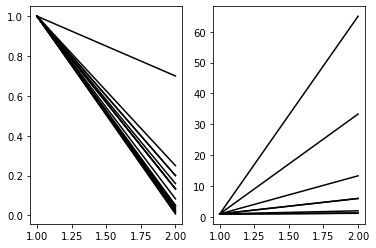

In [71]:
IG_data = np.nan * np.ones((len(IG),2))
IG_data[:,0] = IG['maxquench_diam']
IG_data[:,1] = IG['maxamplif_diam']
IG_data[:,1] = IG_data[:,1] / IG_data[:,0]
IG_data[:,0] = IG_data[:,0] / IG_data[:,0]

ax  = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
a = 0
for i in range(IG_data.shape[0]):
    if ~np.isnan(IG_data[i,1]):
        if IG_data[i,0] >= IG_data[i,1]:
            ax.plot(np.array([1,2]),IG_data[i,:],'k-')
        else:
            a += 1
            ax2.plot(np.array([1,2]),IG_data[i,:],'k-')

C:\Users\lonurmin\Miniconda3\envs\danalysis\lib\site-packages\seaborn\categorical.py:1282: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\lonurmin\Miniconda3\envs\danalysis\lib\site-packages\seaborn\categorical.py:1286: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter
C:\Users\lonurmin\Miniconda3\envs\danalysis\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 22.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='layer', ylabel='maxamplif'>

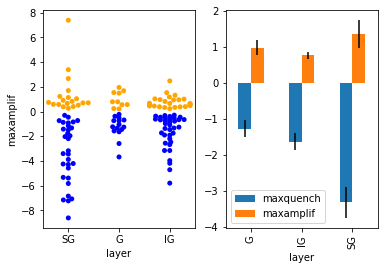

In [80]:
plt.figure()
ax = plt.subplot(1,2,2)
SEM = amplification_DF.groupby('layer')[['maxquench','maxamplif']].sem()
amplification_DF.groupby('layer')[['maxquench','maxamplif']].mean().plot(kind='bar',yerr=SEM,ax=ax)

ax = plt.subplot(1,2,1)
sns.swarmplot(x='layer',y='maxquench',data=amplification_DF,color='blue',ax=ax)
sns.swarmplot(x='layer',y='maxamplif',data=amplification_DF,color='orange',ax=ax)

In [85]:
lm = ols('maxquench ~ C(layer)',data=amplification_DF).fit()
table = sm.stats.anova_lm(lm,typ=1)
print('\n ANOVA over layers for maximum quenching amplitude:')
print(table)

lm = ols('maxamplif ~ C(layer)',data=amplification_DF).fit()
table = sm.stats.anova_lm(lm,typ=1)
print('\n ANOVA over layers for maximum amplification amplitude:')
print(table)




 ANOVA over layers for maximum quenching amplitude:
            df      sum_sq    mean_sq         F    PR(>F)
C(layer)   2.0   63.384457  31.692229  9.917686  0.000144
Residual  79.0  252.446596   3.195527       NaN       NaN

 ANOVA over layers for maximum amplification amplitude:
            df     sum_sq   mean_sq         F    PR(>F)
C(layer)   2.0   3.852022  1.926011  1.695896  0.193422
Residual  52.0  59.055855  1.135690       NaN       NaN
